# Artificial Neural Networks

In [1]:
# Required modules

import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
# Loading the data

data = pd.read_csv('../data/cocomo81.csv')
data.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [3]:
# Inspecting data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
rely      63 non-null float64
data      63 non-null float64
cplx      63 non-null float64
time      63 non-null float64
stor      63 non-null float64
virt      63 non-null float64
turn      63 non-null float64
acap      63 non-null float64
aexp      63 non-null float64
pcap      63 non-null float64
vexp      63 non-null float64
lexp      63 non-null float64
modp      63 non-null float64
tool      63 non-null float64
sced      63 non-null float64
loc       63 non-null float64
actual    63 non-null float64
dtypes: float64(17)
memory usage: 8.5 KB


,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.113810,1.14381,1.008413,0.971746,0.905238,0.948571,0.93746,1.005238,1.001429,1.004127,1.016984,1.048889,77.209841,683.320635
std,0.193477,0.073431,0.202563,0.161639,0.17942,0.120593,0.080973,0.151507,0.119243,0.16651,0.093375,0.051988,0.130935,0.085735,0.075586,168.509374,1821.582348
min,0.750000,0.940000,0.700000,1.000000,1.00000,0.870000,0.870000,0.710000,0.820000,0.70000,0.900000,0.950000,0.820000,0.830000,1.000000,1.980000,5.900000
25%,0.880000,0.940000,1.000000,1.000000,1.00000,0.870000,0.870000,0.860000,0.820000,0.86000,0.900000,0.950000,0.910000,1.000000,1.000000,8.650000,40.500000
50%,1.000000,1.000000,1.070000,1.060000,1.06000,1.000000,1.000000,0.860000,1.000000,0.86000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,98.000000
75%,1.150000,1.040000,1.300000,1.110000,1.21000,1.150000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.100000,1.100000,1.080000,60.000000,438.000000
max,1.400000,1.160000,1.650000,1.660000,1.56000,1.300000,1.150000,1.460000,1.290000,1.42000,1.210000,1.140000,1.240000,1.240000,1.230000,1150.000000,11400.000000


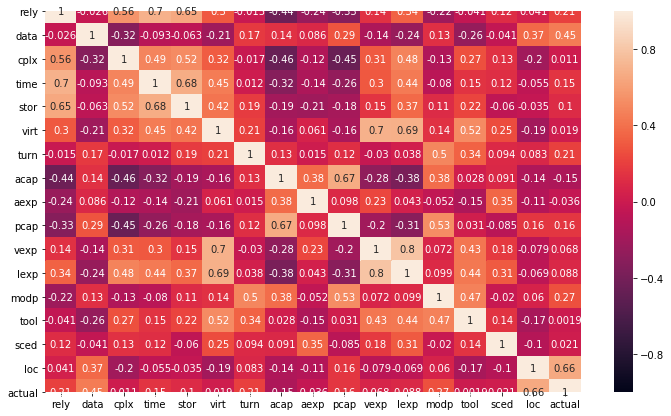

In [4]:
# Correlation matrix

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

In [12]:
# Separating into features and labels

X = data.loc[:, data.columns != 'actual']
y = data[['actual']]

In [13]:
# Scaling the data

# scaling the features
scale_feature = MinMaxScaler()
scale_feature.fit(X)
scaled_X = scale_feature.transform(X)

# scaling the labels
scale_labels = MinMaxScaler()
scale_labels.fit(y)
scaled_y = scale_labels.transform(y)

In [14]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.20, random_state=88)

In [15]:
# Defining a model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(23, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Running the model
epochs = 20

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Train on 50 samples, validate on 13 samples
Epoch 1/20
50/50 [==============================] - 0s 3ms/sample - loss: 0.0621 - val_loss: 0.0934
Epoch 2/20
50/50 [==============================] - 0s 96us/sample - loss: 0.0497 - val_loss: 0.0918
Epoch 3/20
50/50 [==============================] - 0s 99us/sample - loss: 0.0388 - val_loss: 0.0912
Epoch 4/20
50/50 [==============================] - 0s 125us/sample - loss: 0.0313 - val_loss: 0.0916
Epoch 5/20
50/50 [==============================] - 0s 131us/sample - loss: 0.0259 - val_loss: 0.0925
Epoch 6/20
50/50 [==============================] - 0s 133us/sample - loss: 0.0217 - val_loss: 0.0935
Epoch 7/20
50/50 [==============================] - 0s 121us/sample - loss: 0.0187 - val_loss: 0.0941
Epoch 8/20
50/50 [==============================] - 0s 113us/sample - loss: 0.0166 - val_loss: 0.0943
Epoch 9/20
50/50 [==============================] - 0s 132us/sample - loss: 0.0151 - val_loss: 0.0940
Epoch 10/20
50/50 [=======================

In [ ]:
# Plotting epochs vs Loss

x_axis = range(1, epochs+1)

_, ax = plt.subplots()
ax.plot()

In [10]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  272       
_________________________________________________________________
dense_1 (Dense)              multiple                  391       
_________________________________________________________________
dense_2 (Dense)              multiple                  24        
Total params: 687
Trainable params: 687
Non-trainable params: 0
_________________________________________________________________
